## - 불러올 패키지 목록

In [1]:
# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 사이킷런 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공

# 사이파이 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 시각화를 위한 패키지
import seaborn as sb
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions

%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False

# Dataset 불러오기 및 data 정보 확인

## 데이터 불러오기

In [2]:
# 분석할 데이터 불러오기 / 데이터프레임 생성
df_iris = pd.read_csv(r'C:\Users\Boanerges\GitHub\TIL\ADP_study\rawdata\iris.csv',
                      index_col = 'Unnamed: 0')
df_iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


## data 정보 확인

In [3]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


# x값(예측변수), y값(목표변수) 설정

In [4]:
# 목표변수와 나머지 변수들을 따로 저장
x = df_iris.iloc[: , 0:4 ]
y = df_iris.iloc[:, 4 ]

In [5]:
# df_iris.data = df_iris.loc[ : , 'Sepal.Length':'Petal.Width' ] .values
# df_iris.feature_names = list( df_iris.drop('Species', axis=1) )

# df_iris.target = df_iris['Species']
# df_iris.target_names = list( df_iris['Species'].unique() )

# 학습/테스트용 데이터셋 분리
- `sklearn.model_selection.train_test_split()`  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [6]:
# 데이터셋 나누고 라벨 분포 확인
x_train, x_test, y_train, y_test  = train_test_split( x, y,
                                                      test_size = 0.3,
                                                      random_state = 154 )

# 라벨별 데이터 분포 확인
print( Counter(y_train) )
print()
print( Counter(y_test) )

Counter({'virginica': 39, 'setosa': 34, 'versicolor': 32})

Counter({'versicolor': 18, 'setosa': 16, 'virginica': 11})


# 모델 생성 및 학습

## 결정나무 모델 생성
- `sklearn.tree.DecisionTreeClassifier()`  https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [7]:
# 의사결정트리 만들기
model_dtclf = DecisionTreeClassifier( random_state = 153)

## train 데이터로 학습 수행
- `.fit()`  https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit

In [8]:
# 모델 학습
model_dtclf.fit( x_train, y_train )

DecisionTreeClassifier(random_state=153)

In [9]:
# 모델의 정답에 대한 정보 확인
model_dtclf.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

# 시각화

## 결정나무 시각화
- `sklearn.tree.plot_tree()`  https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

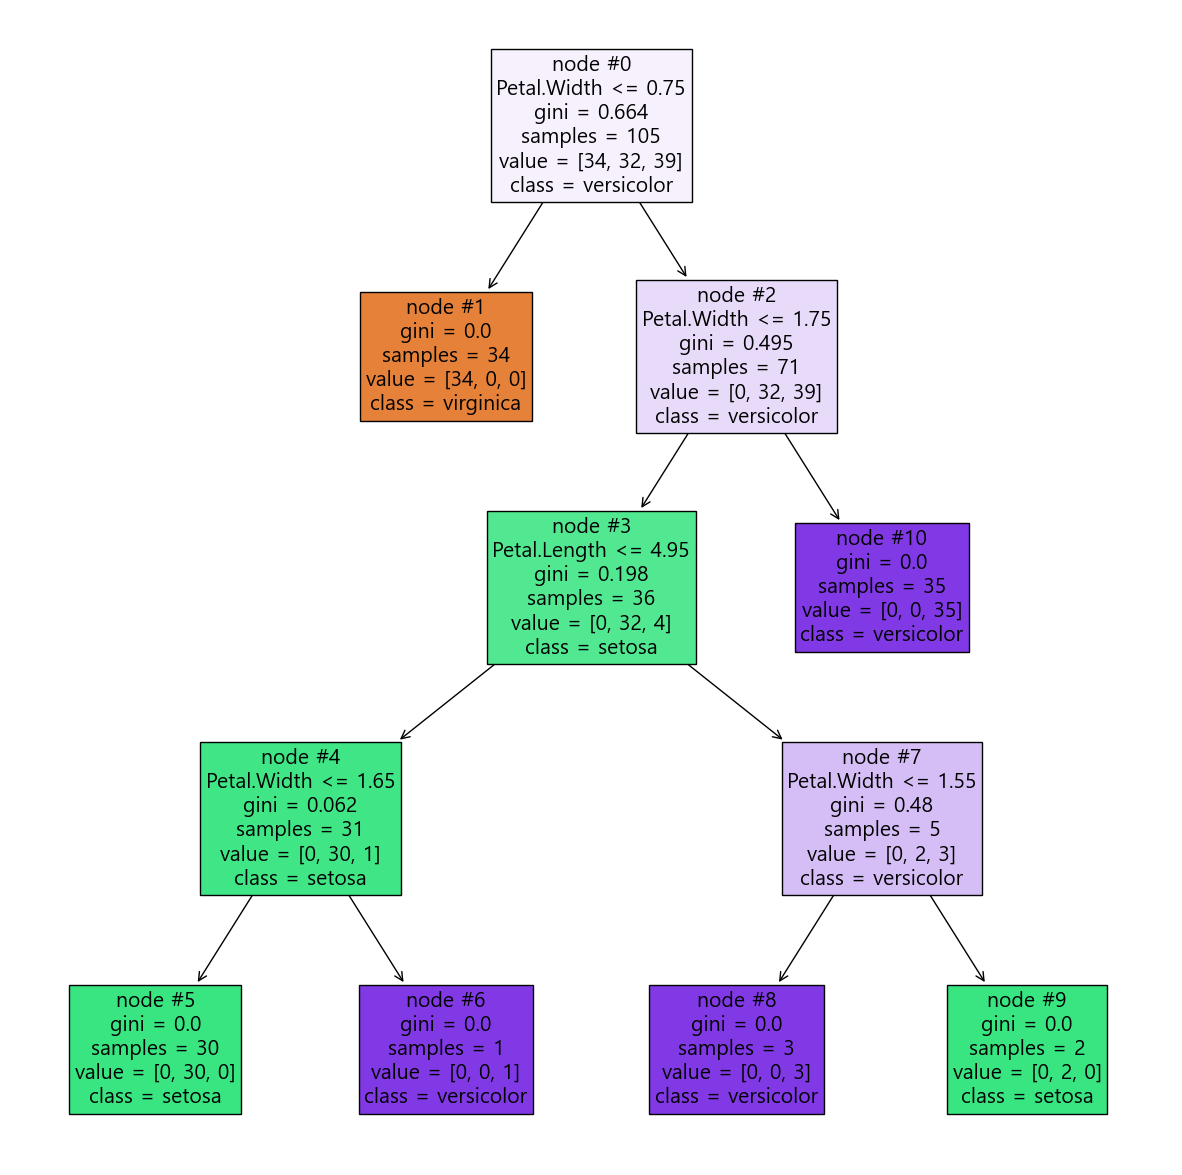

In [10]:
plt.figure( figsize=(15, 15) )

plot_tree( model_dtclf,
           class_names = y_train.unique(),
           feature_names = x_train.columns,
           filled = True,
           node_ids = True,
           fontsize = 15 )

plt.show()

## 결정나무를 텍스트 형식으로 출력
- `sklearn.tree.export_text()`  https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html

In [11]:
tree_text = export_text( model_dtclf )

print( tree_text )

|--- feature_3 <= 0.75
|   |--- class: setosa
|--- feature_3 >  0.75
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: versicolor
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: virginica
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- class: versicolor
|   |--- feature_3 >  1.75
|   |   |--- class: virginica



## 입력변수들의 중요도 확인(확률값)
- `.feature_importances_`  https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_

        feature  importance
0  Sepal.Length    0.000000
1   Sepal.Width    0.000000
2  Petal.Length    0.039793
3   Petal.Width    0.960207



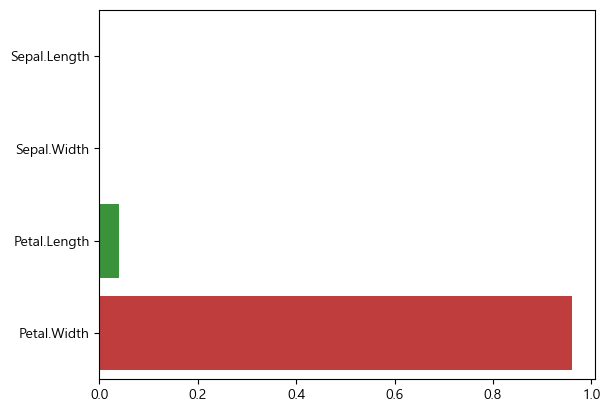

In [12]:
# 입력변수들의 중요도 확인(확률값)

ft_impt = pd.DataFrame( {'feature' : x_train.columns,
                         'importance' : model_dtclf.feature_importances_} )

print( ft_impt )
print()

sb.barplot( x = model_dtclf.feature_importances_,
            y = list( df_iris.drop('Species', axis=1) ) )
plt.show()

# 예측 및 평가

## 학습된 모델로 예측 수행
- `.predict()`  https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict

In [13]:
# 새로운 테스트 데이터로 예측하기
model_dtclf.predict( [ [5.1, 3.5, 4.0, 0.2] ] )

array(['setosa'], dtype=object)

In [14]:
# test 데이터로 라벨 예측
y_pred = model_dtclf.predict( x_test )

pd.DataFrame( {'y_True' : y_test,
               'y_Predict' : y_pred,
               'Pred_Result' : y_test == y_pred} ).head(10)

,y_True,y_Predict,Pred_Result
126,virginica,virginica,True
109,virginica,virginica,True
32,setosa,setosa,True
13,setosa,setosa,True
14,setosa,setosa,True
35,setosa,setosa,True
148,virginica,virginica,True
89,versicolor,versicolor,True
94,versicolor,versicolor,True
54,versicolor,versicolor,True


## 평가

### Confusion Metrix
- `pandas.crosstab()`  https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html
- 
- `sklearn.metrics.confusion_matrix()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [15]:
conf_mat = pd.crosstab( y_test, y_pred, rownames=['pred'], colnames=['real'] )
conf_mat

real,setosa,versicolor,virginica
pred,,,
setosa,16,0,0
versicolor,0,17,1
virginica,0,1,10


In [16]:
confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 10]], dtype=int64)

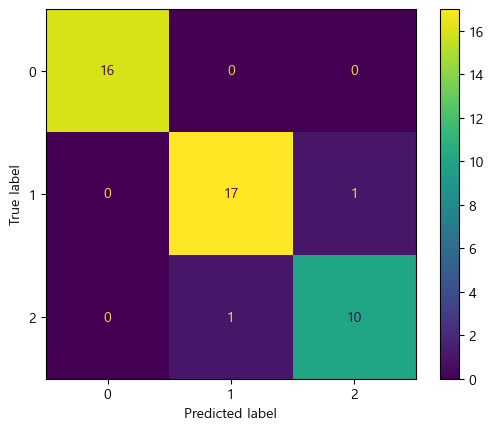

In [17]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm).plot()

In [18]:
cm_multi = multilabel_confusion_matrix(y_test, y_pred)
cm_multi

array([[[29,  0],
        [ 0, 16]],

       [[26,  1],
        [ 1, 17]],

       [[33,  1],
        [ 1, 10]]], dtype=int64)

In [19]:
y_test_1 = np.where( y_test == 'setosa', 1, 0 )
y_pred_1 = np.where( y_pred == 'setosa', 1, 0 )

confusion_matrix(y_test_1, y_pred_1)

array([[29,  0],
       [ 0, 16]], dtype=int64)

### 분석 지표
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.score

- `sklearn.metrics.accuracy_score()` https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
- `sklearn.metrics.classification_report()` https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [20]:
# Accuracy
model_dtclf.score( x_test, y_test )

0.9555555555555556

In [21]:
print( 'Accuracy: ', accuracy_score(y_test, y_pred) )
print()

print( classification_report(y_test, y_pred, digits = 3) )
print()

Accuracy:  0.9555555555555556

              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        16
  versicolor      0.944     0.944     0.944        18
   virginica      0.909     0.909     0.909        11

    accuracy                          0.956        45
   macro avg      0.951     0.951     0.951        45
weighted avg      0.956     0.956     0.956        45




In [22]:
jaccard_score(y_test, y_pred, average='micro')

0.9148936170212766

In [23]:
jaccard_score(y_test, y_pred, average='macro')

0.9093567251461989

In [24]:
jaccard_score(y_test, y_pred, average='weighted')

0.9171539961013647

In [25]:
jaccard_score(y_test, y_pred, average=None)

array([1.        , 0.89473684, 0.83333333])

### [미해결: 다중클래스에 대한 ROC, 사이킷런 가이드의 결과와 다르게 나옴] ROC curve / AUC
- `sklearn.metrics.roc_curve()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
- `sklearn.metrics.RocCurveDisplay()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html
- `sklearn.metrics.roc_auc_score()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
- 
- [참고!] https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

Accuracy:  1.0
AUC:  1.0



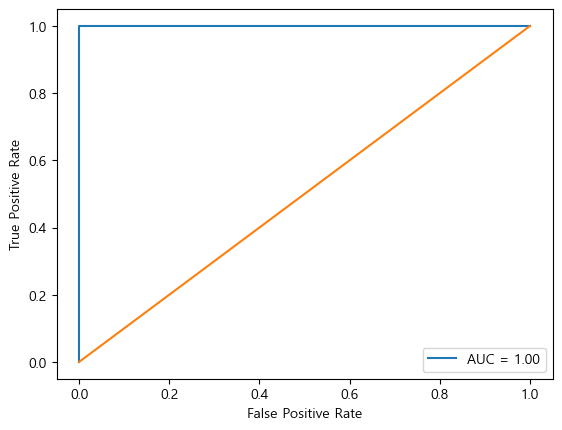

In [26]:
# 'setosa' 에 대한 AUC 계산을 위해 y_test 의 범주형 리스트를 0과 1로 이원화

y_test_1 = np.where( y_test == 'setosa', 1, 0 )
y_pred_1 = np.where( y_pred == 'setosa', 1, 0 )

# Accuracy
acc = accuracy_score(y_test_1, y_pred_1)
print('Accuracy: ', acc )

# AUC 계산
auc = roc_auc_score( y_test_1, y_pred_1 )
print('AUC: ', auc )
print()

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test_1, y_pred_1,
                                  pos_label = 1)

RocCurveDisplay( fpr, tpr).plot()
plt.legend( labels = ['AUC = %.2f' % auc],
            loc = 'lower right')

plt.plot( [0,1], [0,1] )

plt.show()

Accuracy:  0.9555555555555556
AUC:  0.9537037037037037



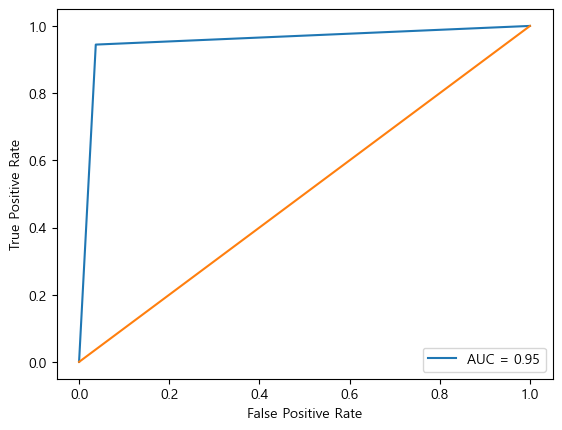

In [27]:
# 'versicolor' 에 대한 AUC 계산을 위해 y_test 의 범주형 리스트를 0과 1로 이원화

y_test_2 = np.where( y_test == 'versicolor', 1, 0 )
y_pred_2 = np.where( y_pred == 'versicolor', 1, 0 )

# Accuracy
acc = accuracy_score(y_test_2, y_pred_2)
print('Accuracy: ', acc )

# AUC 계산
auc = roc_auc_score( y_test_2, y_pred_2 )
print('AUC: ', auc )
print()

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test_2, y_pred_2,
                                  pos_label = 1)

RocCurveDisplay( fpr, tpr).plot()
plt.legend( labels = ['AUC = %.2f' % auc],
            loc = 'lower right')

plt.plot( [0,1], [0,1] )

plt.show()

Accuracy:  0.9555555555555556
AUC:  0.9398395721925135



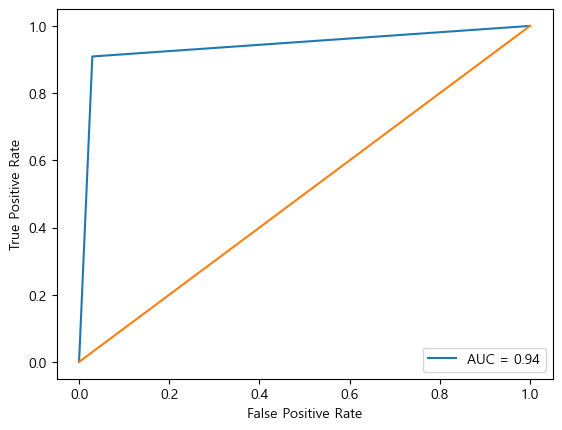

In [28]:
# 'virginica' 에 대한 AUC 계산을 위해 y_test 의 범주형 리스트를 0과 1로 이원화
y_test_3 = np.where( y_test == 'virginica', 1, 0 )
y_pred_3 = np.where( y_pred == 'virginica', 1, 0 )

# Accuracy
acc = accuracy_score(y_test_3, y_pred_3)
print('Accuracy: ', acc )

# AUC 계산
auc = roc_auc_score( y_test_3, y_pred_3 )
print('AUC: ', auc )
print()

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test_3, y_pred_3,
                                  pos_label = 1)

RocCurveDisplay( fpr, tpr).plot()
plt.legend( labels = ['AUC = %.2f' % auc],
            loc = 'lower right')

plt.plot( [0,1], [0,1] )

plt.show()

# 모델 최적화

## Hyper parameter 최적화: `GridSearchCV`
- 교차 검증과 Hyper Parameter 튜닝을 한 번에 수행함.
- `sklearn.model_selection.GridSearchCV()`  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

### 파라미터 확인 및 평가 조건 설정
- `get_params()`  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV.get_params
- `sklearn.model_selection.GridSearchCV()`  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [29]:
# 파라미터 목록 확인
list( model_dtclf.get_params().keys() )

['ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'random_state',
 'splitter']

In [31]:
# 평가할 파라미터 split 조건 설정

params = { 'max_depth' : [3, 4, 5],
           'min_samples_split' : [1, 2, 3, 4, 5],
           'min_samples_leaf' : [1, 2, 3, 4, 5] }

grid = GridSearchCV( model_dtclf,
                     param_grid = params,
                     cv = 10,
                     scoring = 'accuracy')

# split 조건별로 하이퍼 파라미터 학습/평가
grid.fit( x, y )

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=153),
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [32]:
df_grid = pd.DataFrame( grid.cv_results_ )

df_grid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_fit_time            75 non-null     float64
 1   std_fit_time             75 non-null     float64
 2   mean_score_time          75 non-null     float64
 3   std_score_time           75 non-null     float64
 4   param_max_depth          75 non-null     object 
 5   param_min_samples_leaf   75 non-null     object 
 6   param_min_samples_split  75 non-null     object 
 7   params                   75 non-null     object 
 8   split0_test_score        60 non-null     float64
 9   split1_test_score        60 non-null     float64
 10  split2_test_score        60 non-null     float64
 11  split3_test_score        60 non-null     float64
 12  split4_test_score        60 non-null     float64
 13  split5_test_score        60 non-null     float64
 14  split6_test_score        60 

In [33]:
pd.set_option('display.max_colwidth', None)  # 데이터프레임의 셀 폭 설정 (한 셀의 너비에 내용이 다 안들어갈 경우)
pd.set_option('display.max_row', 80)  # 데이터프레임의 출력 행 개수 설정 (한 셀에 모든 행 표시가 안될 경우)

df_grid[ ['params','mean_test_score','rank_test_score'] ].sort_values(['rank_test_score']).head(30)

,params,mean_test_score,rank_test_score
37,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 3}",0.966667,1
36,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}",0.966667,1
64,"{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 5}",0.966667,1
63,"{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 4}",0.966667,1
62,"{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 3}",0.966667,1
61,"{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}",0.966667,1
38,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 4}",0.966667,1
39,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5}",0.966667,1
14,"{'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 5}",0.966667,1
11,"{'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}",0.966667,1


### 최적의 파라미터 추출
- `sklearn.model_selection.GridSearchCV()`  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [34]:
print("최고 Score: ", str(np.round(grid.best_score_, 4)))
print("최적 Parameters: ",str(grid.best_params_))
print("최적 Estimators: ",str(grid.best_estimator_))

최고 Score:  0.9667
최적 Parameters:  {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}
최적 Estimators:  DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, random_state=153)


## 최적 Parameter 조건으로 모델 생성 및 학습

In [35]:
# 의사결정트리 생성
model_dtclf = DecisionTreeClassifier( max_depth=3,
                                      min_samples_leaf=3,
                                      random_state=153 )

# 모델 학습
model_dtclf.fit( x_train, y_train )

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, random_state=153)

## 최적화된 모델로 시각화 및 예측 수행
- `.predict()`  https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict

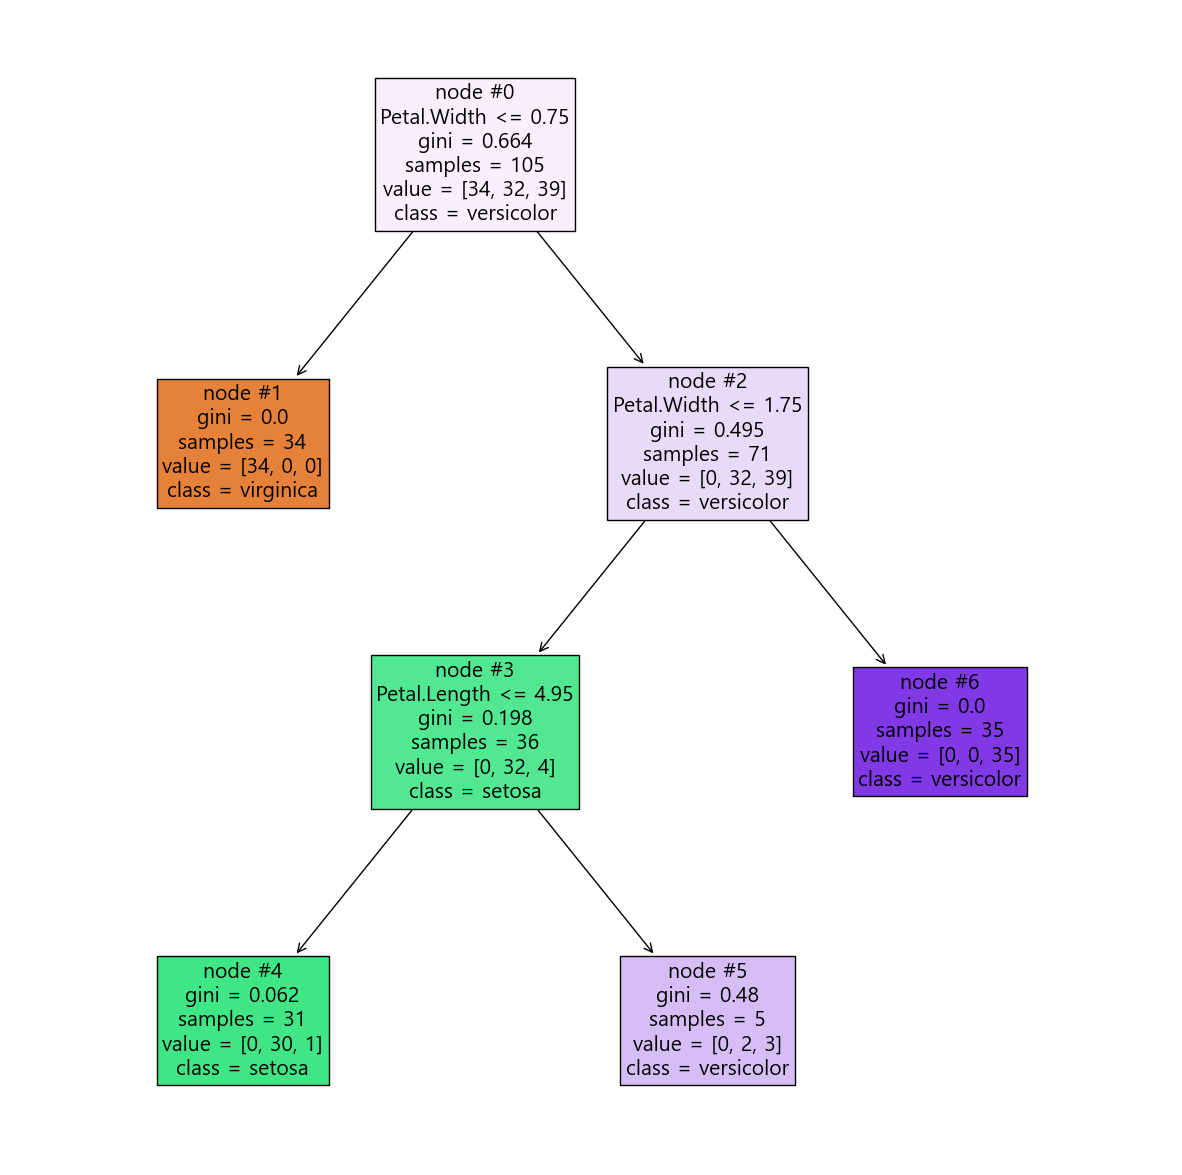

In [36]:
# 시각화
plt.figure( figsize=(15, 15) )
plot_tree( model_dtclf,
           class_names = y_train.unique(),
           feature_names = x_train.columns,
           filled = True,
           node_ids = True,
           fontsize = 15  )
plt.show()

In [37]:
# test 데이터로 라벨 예측
y_pred = model_dtclf.predict( x_test )
print( 'Accuracy:', accuracy_score(y_test, y_pred) )
print()

Accuracy: 0.9777777777777777



### 최적화된 모델의 입력변수들의 중요도 확인(확률값)
- `.feature_importances_`
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

        feature  importance
0  Sepal.Length     0.00000
1   Sepal.Width     0.00000
2  Petal.Length     0.04243
3   Petal.Width     0.95757



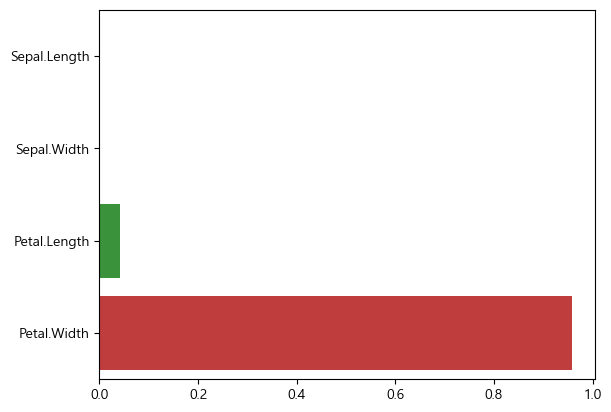

In [38]:
# 입력변수들의 중요도 확인(확률값)

ft_impt = pd.DataFrame( {'feature' : x_train.columns,
                         'importance' : model_dtclf.feature_importances_} )

print( ft_impt )
print()

sb.barplot( x = model_dtclf.feature_importances_,
            y = list( df_iris.drop('Species', axis=1) ) )
plt.show()

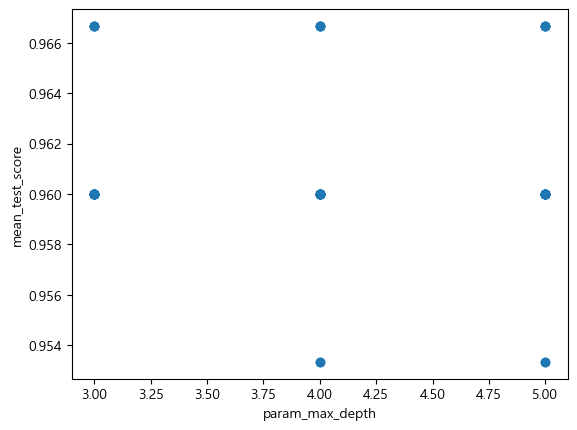

In [39]:
# max_depth 에 따른 평가결과 차이 확인
plt.scatter( df_grid['param_max_depth'], df_grid['mean_test_score'] )
plt.xlabel( 'param_max_depth' )
plt.ylabel( 'mean_test_score' )
plt.show()

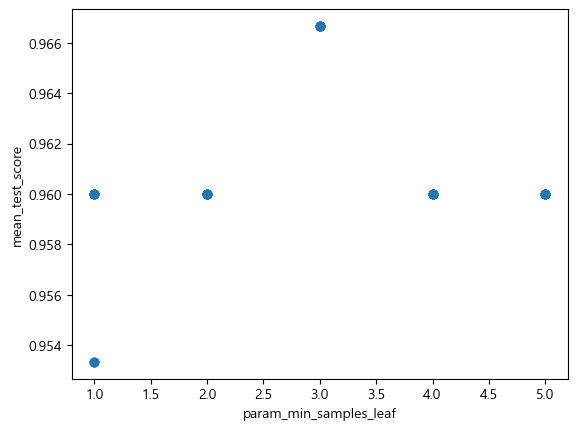

In [40]:
# min_samples_leaf 에 따른 평가결과 차이 확인
plt.scatter( df_grid['param_min_samples_leaf'], df_grid['mean_test_score'] )
plt.xlabel( 'param_min_samples_leaf' )
plt.ylabel( 'mean_test_score' )
plt.show()

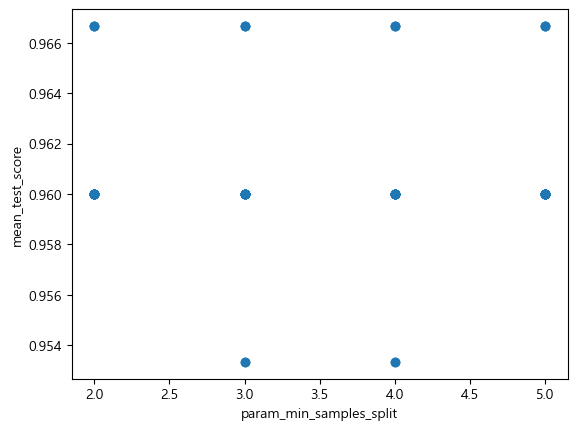

In [41]:
# min_samples_split 에 따른 평가결과 차이 확인
plt.scatter( df_grid['param_min_samples_split'], df_grid['mean_test_score'] )
plt.xlabel( 'param_min_samples_split' )
plt.ylabel( 'mean_test_score' )
plt.show()

## 최적화 모델 평가

### Confusion Metrix

In [42]:
confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

In [43]:
pd.crosstab( y_test, y_pred, rownames=['pred'], colnames=['real'] )

real,setosa,versicolor,virginica
pred,,,
setosa,16,0,0
versicolor,0,17,1
virginica,0,0,11


### 분석 지표
- `sklearn.metrics.accuracy_score()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
- `sklearn.metrics.classification_report()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [44]:
# Accuracy
model_dtclf.score( x_test, y_test )

0.9777777777777777

In [45]:
print( 'Accuracy: ', accuracy_score(y_test, y_pred) )
print()

print( classification_report(y_test, y_pred, digits = 3) )
print()

Accuracy:  0.9777777777777777

              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        16
  versicolor      1.000     0.944     0.971        18
   virginica      0.917     1.000     0.957        11

    accuracy                          0.978        45
   macro avg      0.972     0.981     0.976        45
weighted avg      0.980     0.978     0.978        45




### 데이터별 예측 확률
- `.predict_proba()`
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict_proba

In [46]:
proba = model_dtclf.predict_proba(x_test)

df_proba = pd.DataFrame( proba, columns = model_dtclf.classes_ )

df_proba.head()

,setosa,versicolor,virginica
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


### ROC curve / AUC
- `sklearn.metrics.roc_curve()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
- `sklearn.metrics.RocCurveDisplay()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html
- `sklearn.metrics.roc_auc_score()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

AUC:  1.0


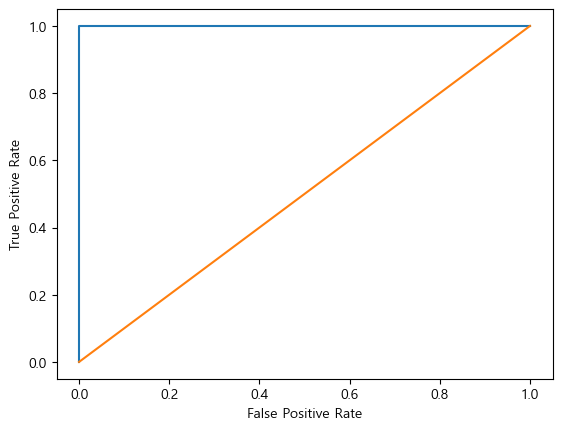

In [47]:
# 'setosa' 에 대한 AUC 계산을 위해 y_test 의 범주형 리스트를 0과 1로 이원화
result_1 = y_test.apply(lambda x: 1 if 'setosa' == x else 0 )

# 'sotosa' 에 대한 proba 추출'
proba_1 = df_proba['setosa']

# AUC 계산
print('AUC: ', roc_auc_score( result_1, proba_1 ) )

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test, proba_1,
                                  pos_label='setosa')

RocCurveDisplay( fpr, tpr).plot()

plt.plot( [0,1], [0,1],
          label = 'Random')
plt.show()

AUC:  0.9711934156378601


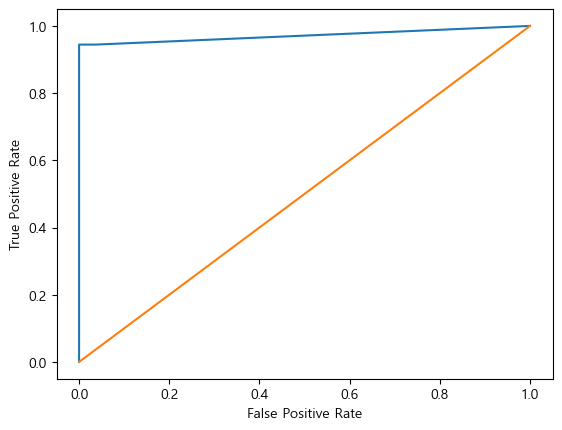

In [48]:
# 'versicolor' 에 대한 AUC 계산을 위해 y_test 의 범주형 리스트를 0과 1로 이원화
result_2 = y_test.apply(lambda x: 1 if 'versicolor' == x else 0 )

# 'versicolor' 에 대한 proba 추출'
proba_2 = df_proba['versicolor']

# AUC 계산
print('AUC: ', roc_auc_score( result_2, proba_2 ) )

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test, proba_2,
                                  pos_label='versicolor')

RocCurveDisplay( fpr, tpr).plot()

plt.plot( [0,1], [0,1],
          label = 'Random')
plt.show()

AUC:  0.983957219251337


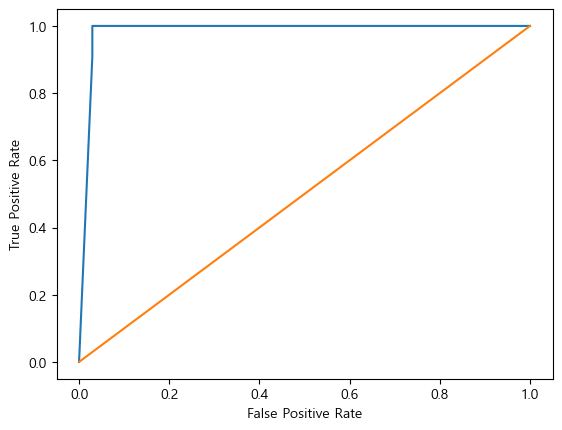

In [49]:
# 'virginica' 에 대한 AUC 계산을 위해 y_test 의 범주형 리스트를 0과 1로 이원화
result_3 = y_test.apply(lambda x: 1 if 'virginica' == x else 0 )

# 'virginica' 에 대한 proba 추출'
proba_3 = df_proba['virginica']

# AUC 계산
print('AUC: ', roc_auc_score( result_3, proba_3 ) )

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test, proba_3,
                                  pos_label='virginica')

RocCurveDisplay( fpr, tpr).plot()

plt.plot( [0,1], [0,1],
          label = 'Random')
plt.show()

In [50]:
pd.DataFrame( {'setosa':result_1,
               'proba_1':proba_1,
               'versicolor':result_2,
               'proba_2':proba_2,
               'virginica':result_3,
               'proba_3':proba_3} ).head()

,setosa,proba_1,versicolor,proba_2,virginica,proba_3
0,NaN,0.0,NaN,0.0,NaN,1.0
1,NaN,0.0,NaN,0.0,NaN,1.0
2,NaN,1.0,NaN,0.0,NaN,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0
4,NaN,1.0,NaN,0.0,NaN,0.0


# [참고] 결정나무의 Parameters
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## 결정나무의 최대 깊이 제어
- `sklearn.tree.DecisionTreeClassifier( max_depth = int, default=None )`
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Accuracy: 0.9777777777777777


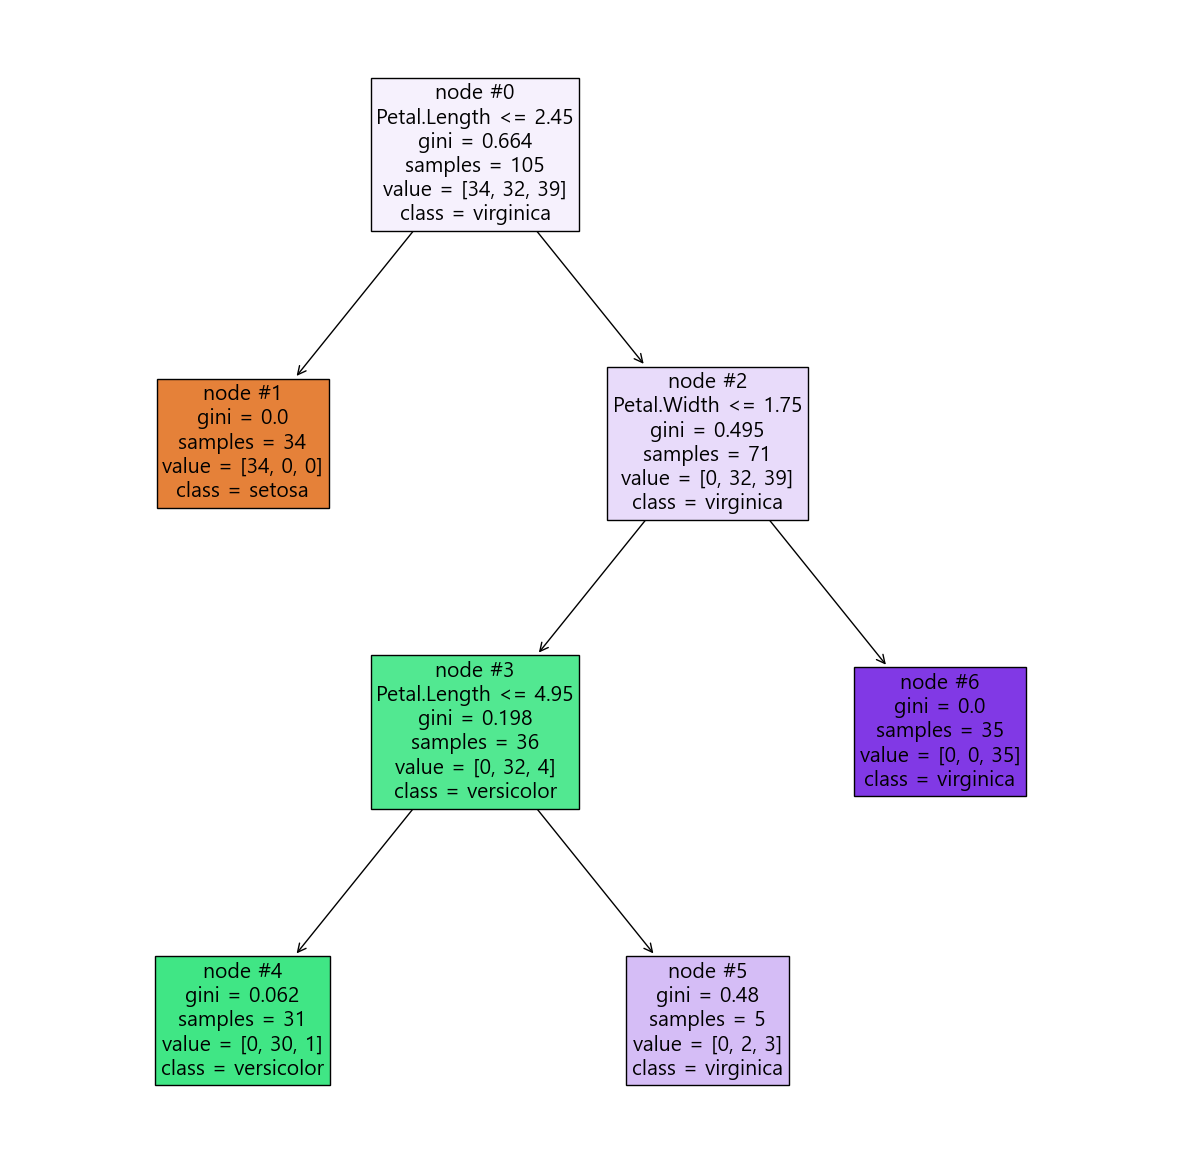

In [51]:
# 의사결정트리 생성
model_dtclf = DecisionTreeClassifier( max_depth = 3,
                                      random_state = 156 )

# 모델 학습
model_dtclf.fit( x_train, y_train )

# test 데이터로 라벨 예측
y_pred = model_dtclf.predict( x_test )
print( 'Accuracy:', accuracy_score(y_test, y_pred) )

# 시각화
plt.figure( figsize=(15, 15) )
plot_tree( model_dtclf,
           class_names = df_iris['Species'].unique(),
           feature_names = list(df_iris.drop('Species', axis =1)),
           filled = True,
           node_ids = True,
           fontsize = 15  )
plt.show()

## 자식노드를 생성하기 위한 최소 데이터 개수 설정
- `sklearn.tree.DecisionTreeClassifier( min_samples_split = int or float, default=2 )`
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Accuracy: 0.9333333333333333


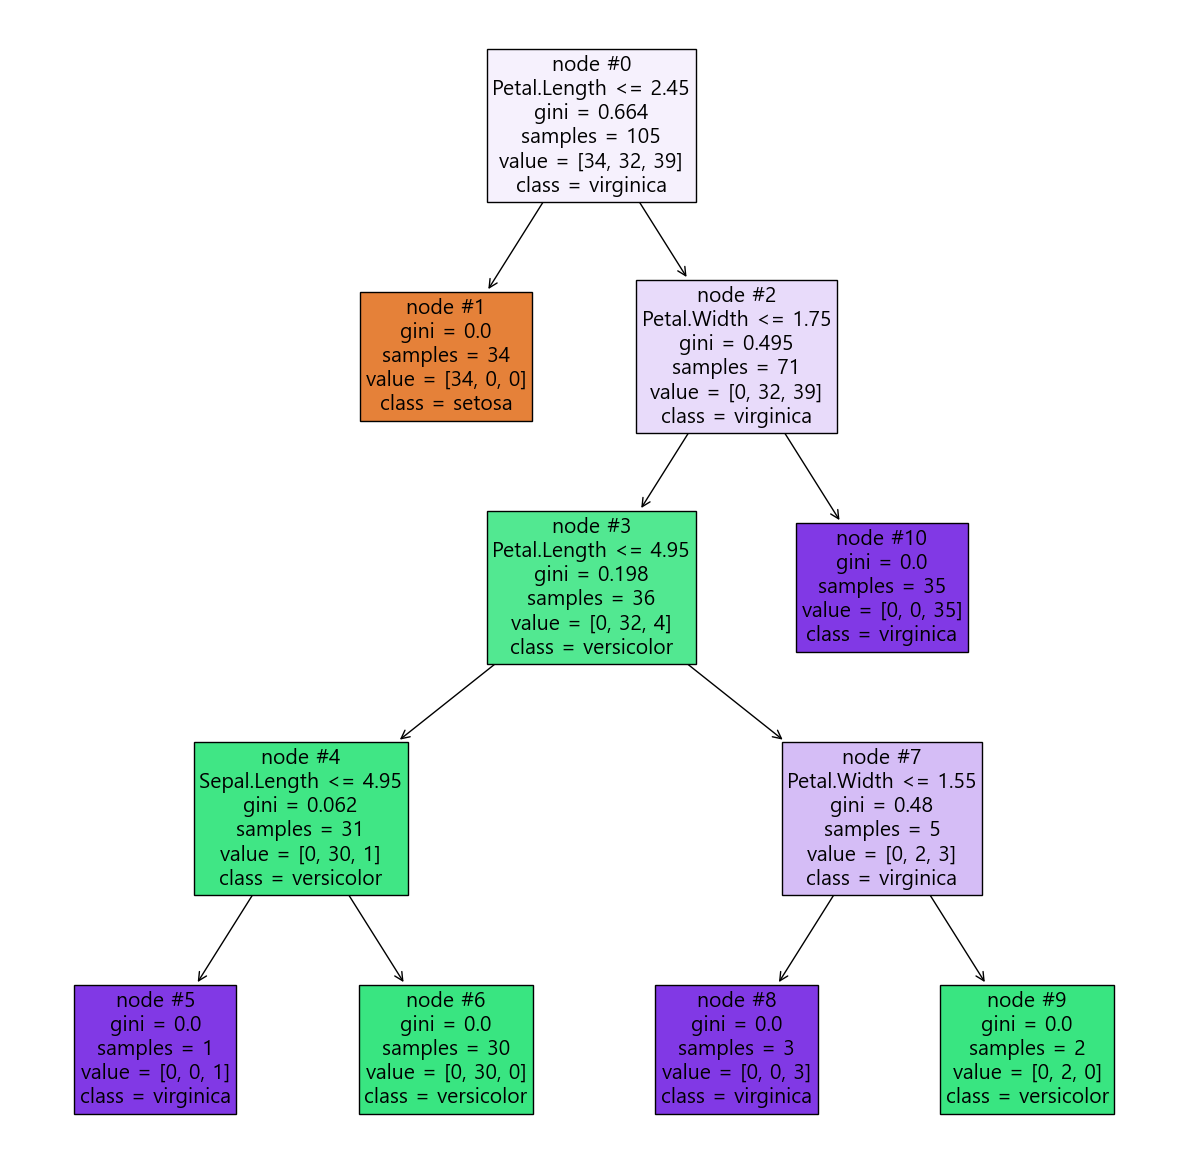

In [52]:
# 의사결정트리 생성
model_dtclf = DecisionTreeClassifier( min_samples_split = 3,
                                      random_state = 156 )

# 모델 학습
model_dtclf.fit( x_train, y_train )

# test 데이터로 라벨 예측
y_pred = model_dtclf.predict( x_test )
print( 'Accuracy:', accuracy_score(y_test, y_pred) )

# 시각화
plt.figure( figsize=(15, 15) )
plot_tree( model_dtclf,
           class_names = df_iris['Species'].unique(),
           feature_names = list(df_iris.drop('Species', axis =1)),
           filled = True,
           node_ids = True,
           fontsize = 15  )
plt.show()

## 리프 노드가 될 수 있는 최소 데이터 개수 설정
- `sklearn.tree.DecisionTreeClassifier( min_samples_leaf = int or float, default=1 )`
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Accuracy: 0.9555555555555556


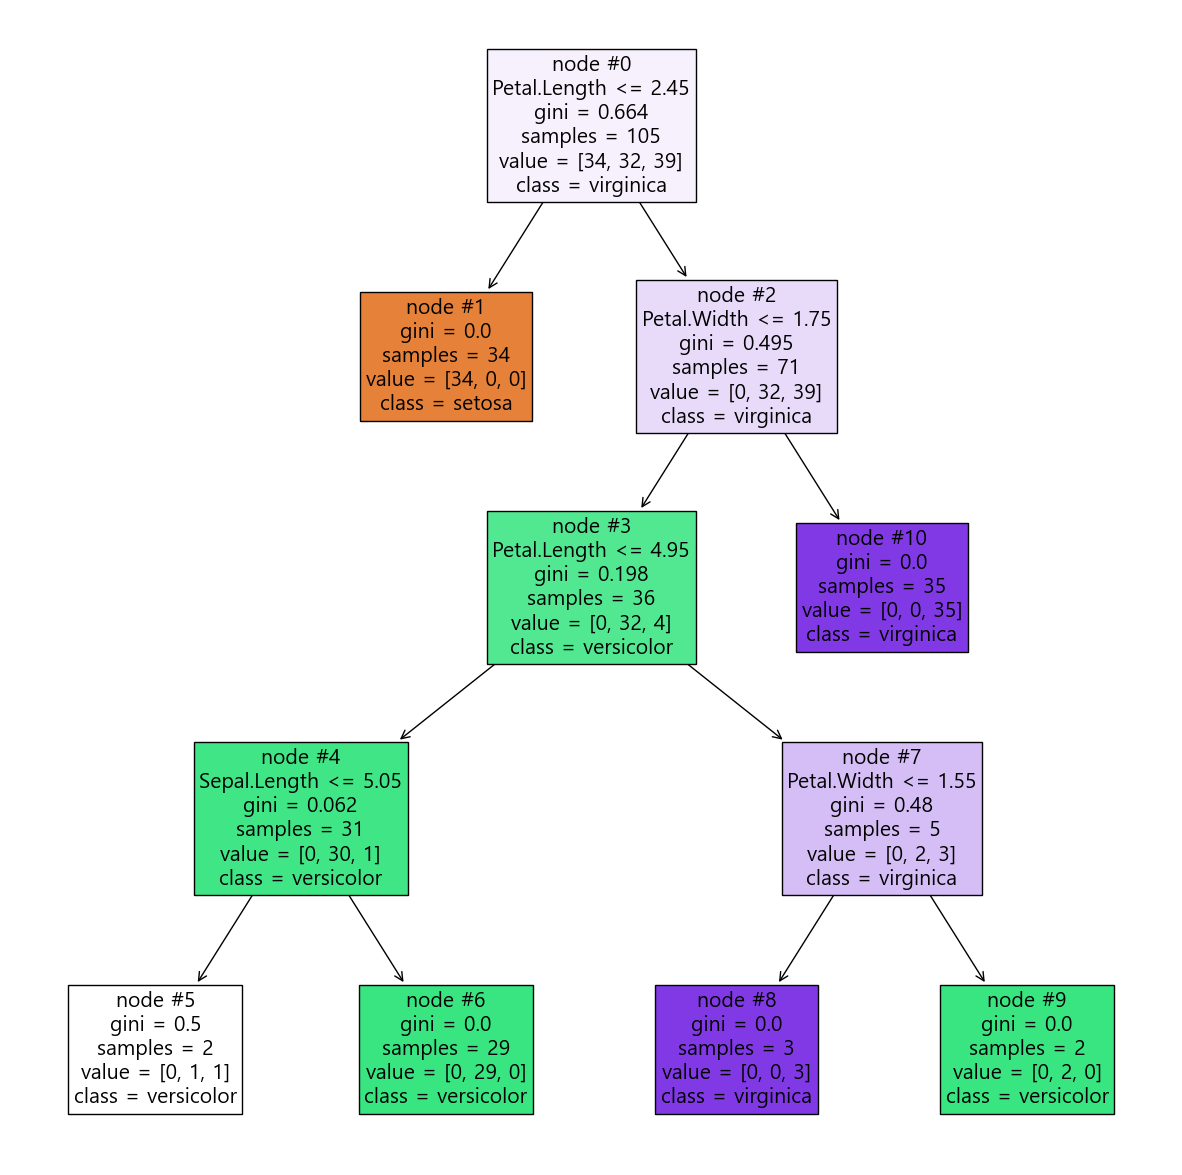

In [53]:
# 의사결정트리 생성
model_dtclf = DecisionTreeClassifier( min_samples_leaf = 2,
                                      random_state = 156 )

# 모델 학습
model_dtclf.fit( x_train, y_train )

# test 데이터로 라벨 예측
y_pred = model_dtclf.predict( x_test )
print( 'Accuracy:', accuracy_score(y_test, y_pred) )

# 시각화
plt.figure( figsize=(15, 15) )
plot_tree( model_dtclf,
           class_names = df_iris['Species'].unique(),
           feature_names = list(df_iris.drop('Species', axis =1)),
           filled = True,
           node_ids = True,
           fontsize = 15  )
plt.show()

# [참고] 결정나무의 과적합 여부 확인

In [54]:
# 2차원 시각화를 위해 두 개의 독립변수만 사용
x2 = df_iris.iloc[:, [2, 3] ]
y2 = df_iris.iloc[:,4]

In [55]:
encoder = LabelEncoder()
encoder.fit(y2)

labels = encoder.transform(y2)
y2 = labels

In [56]:
y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [57]:
# 데이터셋 나누기
x2_train, x2_test, y2_train, y2_test  = train_test_split( x2, y2,
                                                          test_size = 0.30,
                                                          random_state = 153 )

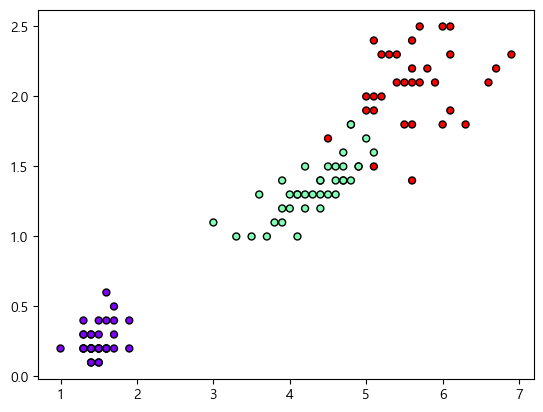

In [58]:
# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter( x2_train['Petal.Length'], x2_train['Petal.Width'],
             marker='o',
             c = y2_train,
             s = 25,
             cmap='rainbow',
             edgecolor='k')
plt.show()

In [59]:
# Classifier의 Decision Boundary를 시각화 하는 함수

def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(x2_train['Petal.Length'], x2_train['Petal.Width'], c=y2_train, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

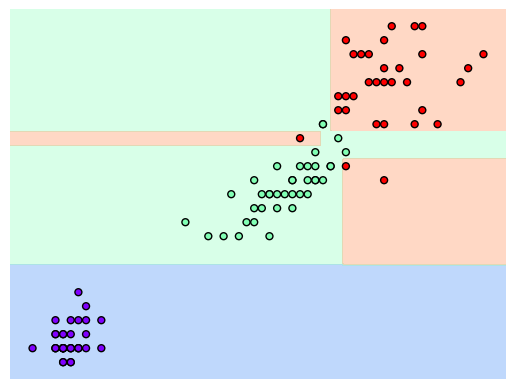

In [60]:
# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier(random_state=153).fit(x2_train, y2_train)

visualize_boundary(dt_clf, x2_train, y2_train)

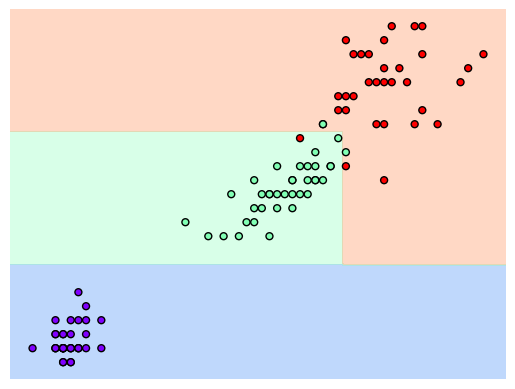

In [61]:
# 하이퍼 파라미터 최적화 결과를 적용한 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, random_state=153).fit(x2_train, y2_train)

visualize_boundary(dt_clf, x2_train, y2_train)